# Abengers 능력치 비교하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
abengers_df = pd.read_csv('heroes/charcters_stats.csv')

abengers_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


일단, 캐릭터의 모든 능력치의 합이 'Total'이라는 형태로 저장이 되어있다.  
능력치의 합이 가장 큰 캐릭터는 Total만 확인하면 된다.

In [4]:
mx_total = abengers_df['Total'].max()
print(mx_total)

581


이제, 최대 수치를 구했으니, 해당 히어로를 찾아내면 된다.

In [5]:
mx_total_hero = abengers_df[abengers_df['Total'] == mx_total]
s = mx_total_hero.Name.values[0]

print(f'1st ability hero is {s}')

1st ability hero is Martian Manhunter


# 능력치 분포 확인

In [6]:
abengers_df.groupby('Alignment').mean()
# 평균적인 수치나 count, sum, corr 등의 함수가 가능하다

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


일단, 각 능력치에 대해 분포밀도를 살펴보기 위해 kdeplot을 사용해본다.

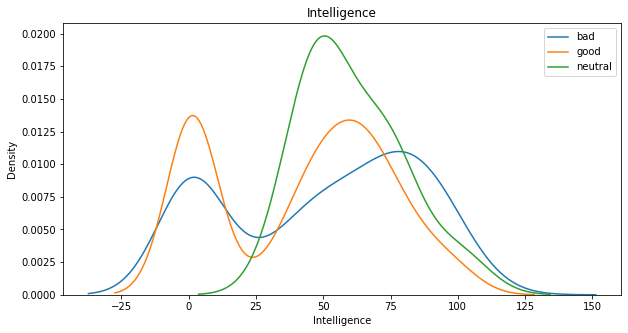

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'bad']['Intelligence'], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'good']['Intelligence'], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'neutral']['Intelligence'], ax=ax)

plt.title('Intelligence')
plt.legend(['bad', 'good', 'neutral'])
plt.show()

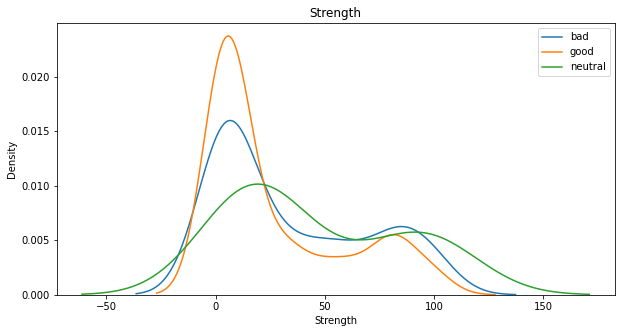

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'bad']['Strength'], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'good']['Strength'], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'neutral']['Strength'], ax=ax)

plt.title('Strength')
plt.legend(['bad', 'good', 'neutral'])
plt.show()

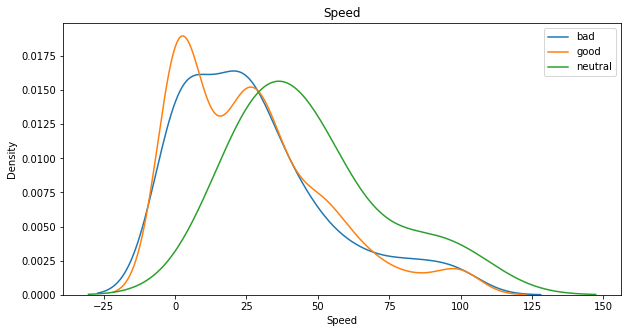

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
idx = 'Speed'
# Speed Durability Power Combat Total
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'bad'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'good'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'neutral'][idx], ax=ax)

plt.title(idx)
plt.legend(['bad', 'good', 'neutral'])
plt.show()

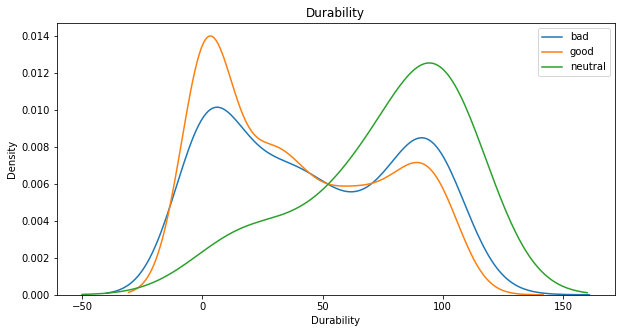

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
idx = 'Durability'
# Speed Durability Power Combat Total
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'bad'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'good'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'neutral'][idx], ax=ax)

plt.title(idx)
plt.legend(['bad', 'good', 'neutral'])
plt.show()

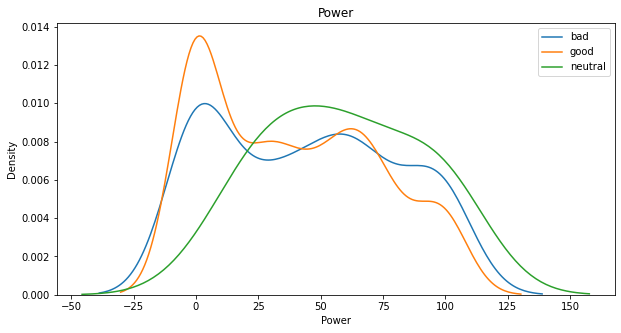

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
idx = 'Power'
# Speed Durability Power Combat Total
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'bad'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'good'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'neutral'][idx], ax=ax)

plt.title(idx)
plt.legend(['bad', 'good', 'neutral'])
plt.show()

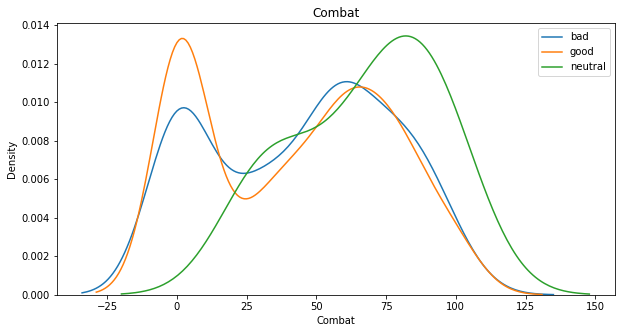

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
idx = 'Combat'
# Speed Durability Power Combat Total
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'bad'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'good'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'neutral'][idx], ax=ax)

plt.title(idx)
plt.legend(['bad', 'good', 'neutral'])
plt.show()

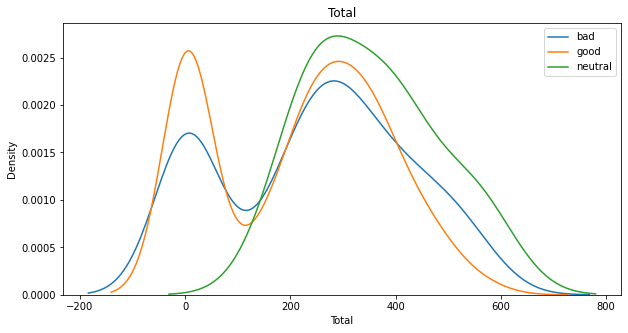

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
idx = 'Total'
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'bad'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'good'][idx], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'neutral'][idx], ax=ax)

plt.title(idx)
plt.legend(['bad', 'good', 'neutral'])
plt.show()